In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.layers import Convolution2D

In [4]:
cnn = Sequential()

In [5]:
'''
nb_filter = no. of feture detectors( for each feature map we will be having diffrent feture detectors.)
So, no. of desired feture map = no. of feture detectors.

#Note :- filter/Convolution kernal both are another names of feature detectors.

nb_row = no. of rows in feture detectors.
nb_col = no. of columns in feture detectors.
border_modes = 'same' describes how the feture detectors are going to handle the borders of input images. 
                Same is the default value.

input_shape = input_shape is to set the limit for all input images. as all images has differnt size and formats to generalize
                all images formate into one formate we use input_shape
                
If Image = 'Coloured_Image':
    input image will be converted into 3-d array( R, G and B )

elif Image == 'Black&White_Image':
    input image will be converted into 2-d array.
'''

'''
Convolution2D( no_of_feture_detectors, 
              no_of_rows_in_feature_detectors, 
              no_of_cols_in_feature_detectors, 
              border_mode = 'same',
              activation = 'relu'              #As we will use max pooling.
             input_shape = formate of input images./ ( 3, 256, 256 ) ) # Here 3 is for coloured Images and it should be 1 for
                                                                       # black and white images.
                                                                # 256 and 256 are the dimensions of the array in the channel. 
                                                                
            but there is diffrence. We will be using tensor flow and in tensor flow. the way of writing the shapes in
            input_shape is opposite. ( 256, 256, 3 )
'''

"\nConvolution2D( no_of_feture_detectors, \n              no_of_rows_in_feature_detectors, \n              no_of_cols_in_feature_detectors, \n              border_mode = 'same',\n              activation = 'relu'              #As we will use max pooling.\n             input_shape = formate of input images./ ( 3, 256, 256 ) ) # Here 3 is for coloured Images and it should be 1 for\n                                                                       # black and white images.\n                                                                # 256 and 256 are the dimensions of the array in the channel. \n                                                                \n            but there is diffrence. We will be using tensor flow and in tensor flow. the way of writing the shapes in\n            input_shape is opposite. ( 256, 256, 3 )\n"

In [6]:
cnn.add( Convolution2D( 32, 3, 3, border_mode = 'same', input_shape = ( 64, 64, 3  ), activation = 'relu' ) )

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.


In [7]:
from keras.layers import MaxPooling2D

In [8]:
#Applying Pooling the CNN
cnn.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )

In [9]:
from keras.layers import Flatten

In [10]:
#Flattening - Input Layer for ANN.

cnn.add( Flatten() )

In [11]:
from keras.layers import Dense

In [12]:
#Full Connection/ Applyin ANN.

cnn.add( Dense( output_dim = 128, activation = 'relu') )

'''
Here, output_dim in Dense() is hit and trail value. We need to put the value and test. If the output_dim( Which is ulimately
        going to be the input of hidden layer) is near and >= 100 and output_dim must be a value which is the power of 2
        then, It is Idle.
        
#we don't know the input_layer because, our input node of 1st layer is nothing but the Flattening result( which is m*n of relu
        shape ).

#we don't need to write init as we use it set out 1st nodes value somewhere around 0 but here we already have dynamic node 
    values.
'''

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  This is separate from the ipykernel package so we can avoid doing imports until


"\nHere, output_dim in Dense() is hit and trail value. We need to put the value and test. If the output_dim( Which is ulimately\n        going to be the input of hidden layer) is near and >= 100 and output_dim must be a value which is the power of 2\n        then, It is Idle.\n        \n#we don't know the input_layer because, our input node of 1st layer is nothing but the Flattening result( which is m*n of relu\n        shape ).\n\n#we don't need to write init as we use it set out 1st nodes value somewhere around 0 but here we already have dynamic node \n    values.\n"

In [13]:
cnn.add( Dense( output_dim = 1, activation = 'sigmoid' ) )

'''
#We are considering sigmoid as as output either we have Cat or Dog. Only 2 Categories. So, In Sigmoid.

if( Input_Image == 'Dog' ):
    Output of sigmoid can be either True or False.
    
    if( Sigmoid_value == False ):
        Then, It is not a Dog which means it's a cat.
    
    else:
        It is a Dog.

else:
    if( Sigmoid_value == False ):
        Then, It is not a Cat which means it's a Dog.
    
    else:
        It is a Cat.
'''

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


"\n#We are considering sigmoid as as output either we have Cat or Dog. Only 2 Categories. So, In Sigmoid.\n\nif( Input_Image == 'Dog' ):\n    Output of sigmoid can be either True or False.\n    \n    if( Sigmoid_value == False ):\n        Then, It is not a Dog which means it's a cat.\n    \n    else:\n        It is a Dog.\n\nelse:\n    if( Sigmoid_value == False ):\n        Then, It is not a Cat which means it's a Dog.\n    \n    else:\n        It is a Cat.\n"

In [14]:
#Compiling the model.

cnn.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )

In [15]:
#Image Pre-Processing/ Augmentation.

'''
We need to do Data Pre-Processing as we know. CNN is going to find the patterns in the pixel and based on those patterns.
It is going to process our test data and give the result.

We are giving 12500 data which is not sufficient for CNN to understand the pattern properly. For maximum CNN
understnading of patterns. We need more images.

To arrange images is not a easy task.
So, We need to Image Augmentation. Image Augmentation will rotate( Left, Right, Down ), flip( Mirror Image ), 
blur, etc on our images and creates multiple images from 1 image and the best thing is It happends dynamically.
It doen't store those augmented images and thus, it avoids overfitting also.

and thus, our problem of large Image requirement gets solve. That's why we need Image Augmentation Technique.
'''

"\nWe need to do Data Pre-Processing as we know. CNN is going to find the patterns in the pixel and based on those patterns.\nIt is going to process our test data and give the result.\n\nWe are giving 12500 data which is not sufficient for CNN to understand the pattern properly. For maximum CNN\nunderstnading of patterns. We need more images.\n\nTo arrange images is not a easy task.\nSo, We need to Image Augmentation. Image Augmentation will rotate( Left, Right, Down ), flip( Mirror Image ), \nblur, etc on our images and creates multiple images from 1 image and the best thing is It happends dynamically.\nIt doen't store those augmented images and thus, it avoids overfitting also.\n\nand thus, our problem of large Image requirement gets solve. That's why we need Image Augmentation Technique.\n"

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
#Image Augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,                 #Divide the Image by 255 to make all the pixel value from 0 to 1 as RGBrange 
                                                                                                    #is from 0 to 255. 
        shear_range=0.2,                #Shering Intensiry
        zoom_range=0.2,                 #Zooming Intensity
        horizontal_flip=True,           #Flipping the Image Horizintaly.
        vertical_flip = True)

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_set = train_datagen.flow_from_directory('DataSet/train_data',               #path for the training set
                                                target_size=(64, 64),           #Expected Size/dimension of Image.
                                                                                       #same as input_shape of Convolution2D()
                                                batch_size=32,                    #Every time 32 Images will be taken in batch.
                                                class_mode='binary')            #As output we have only 2 types cats and dogs.
                                                                                        #so, class_mode = 'binary'.

Found 25000 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('DataSet/test_data',
                                            target_size=(64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary' )

Found 430 images belonging to 2 classes.


In [21]:
cnn.fit_generator(  train_set ,
                    samples_per_epoch = 25000,               #No of Images in training data folder
                    nb_epoch = 1,                           #no. of epoch/ no/ of iteration of CNN.
                    validation_data = test_set,
                    nb_val_samples = 430)               #No of Images in testing data folder

c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
c:\users\gauta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=781, epochs=1, validation_steps=430)`
  """


Epoch 1/1
781/781 [==============================] - 170s 218ms/step - loss: 0.6344 - accuracy: 0.6445 - val_loss: 0.5884 - val_accuracy: 0.6859


In [22]:
import numpy as np
from keras.preprocessing import image

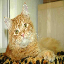

In [83]:
cat_test_image = image.load_img( 'DataSet/Single_prediction/Cat_image.jpg'
                              , target_size = ( 64, 64 ) )    

#we trained our image with target_size as (64, 64). So, while testing also target must be same as training target_size.

cat_test_image

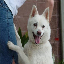

In [84]:
dog_test_image = image.load_img( 'DataSet/Single_prediction/Dog_image.jpg'
                              , target_size = ( 64, 64 ) )
dog_test_image

In [85]:
#We need to convert out image into RGB pixels. as while creating CNN Layer we gave input_size as ( 64, 64, 3 ).

In [86]:
cat_test_image_arr = image.img_to_array( cat_test_image )
dog_test_image_arr = image.img_to_array( dog_test_image )

In [87]:
print( f"cat_test_image_arr.shape = { cat_test_image_arr.shape } and type( cat_test_image_arr ) = { type( cat_test_image_arr ) }" )
cat_test_image_arr

cat_test_image_arr.shape = (64, 64, 3) and type( cat_test_image_arr ) = <class 'numpy.ndarray'>


array([[[179., 184., 154.],
        [185., 190., 160.],
        [168., 173., 143.],
        ...,
        [ 97.,  80.,  26.],
        [111.,  95.,  44.],
        [119., 106.,  54.]],

       [[185., 190., 160.],
        [194., 199., 169.],
        [172., 177., 147.],
        ...,
        [160., 139.,  72.],
        [154., 136.,  72.],
        [140., 126.,  61.]],

       [[189., 194., 164.],
        [198., 203., 173.],
        [174., 179., 149.],
        ...,
        [167., 137.,  83.],
        [158., 137.,  74.],
        [147., 132.,  67.]],

       ...,

       [[  1.,   3.,   2.],
        [ 22.,  20.,   5.],
        [ 28.,  27.,   7.],
        ...,
        [ 82.,  57.,  16.],
        [ 31.,  29.,  17.],
        [ 56.,  39.,  11.]],

       [[  6.,   8.,   7.],
        [ 67.,  57.,  45.],
        [ 47.,  41.,  29.],
        ...,
        [107.,  61.,   9.],
        [ 20.,  25.,  18.],
        [112.,  91.,  34.]],

       [[ 39.,  36.,  19.],
        [ 19.,   9.,   0.],
        [ 17.,  

In [88]:
print( f"dog_test_image_arr.shape = { dog_test_image_arr.shape } and type( dog_test_image_arr ) = { type( dog_test_image_arr ) }" )
dog_test_image_arr

dog_test_image_arr.shape = (64, 64, 3) and type( dog_test_image_arr ) = <class 'numpy.ndarray'>


array([[[ 47.,  67.,  91.],
        [ 33.,  57.,  83.],
        [ 51.,  82., 102.],
        ...,
        [121., 130., 127.],
        [113., 122., 117.],
        [121., 130., 125.]],

       [[ 11.,  38.,  65.],
        [ 45.,  76., 107.],
        [ 46.,  77., 108.],
        ...,
        [117., 126., 121.],
        [117., 126., 121.],
        [122., 131., 126.]],

       [[ 17.,  37.,  61.],
        [ 58.,  82., 108.],
        [ 43.,  73.,  99.],
        ...,
        [114., 124., 115.],
        [115., 124., 119.],
        [121., 130., 125.]],

       ...,

       [[ 33.,  51.,  75.],
        [ 20.,  38.,  62.],
        [ 22.,  38.,  63.],
        ...,
        [ 27.,  36.,   7.],
        [ 42.,  57.,  26.],
        [107., 119.,  97.]],

       [[ 29.,  46.,  74.],
        [ 22.,  39.,  67.],
        [ 28.,  44.,  70.],
        ...,
        [ 15.,  23.,   8.],
        [ 71.,  86.,  53.],
        [ 48.,  61.,  31.]],

       [[ 24.,  41.,  61.],
        [ 22.,  38.,  63.],
        [ 23.,  

In [89]:
#Now, Let's Check the predicted Value for the above pixel image.
cnn.predict( cat_test_image_arr )

#But, we will get Error, because, we need 4 dimension matrix not 3 dimesion.

#Now the Question is why 4 dimension Matrix not 3 ?
#Ans :- Because, CNN accepts image in a batch. Even if the no. of image is 1 and if it is in the batch then, it can predict.
        #So, batch_size(1 dim) * image_dim( 3 dim ) = 4 dim_output
    
#Solution :- we need to expand our dimension using expand() available in numpy as our iamge pixel dataset is already in numpy

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (64, 64, 3)

In [90]:
cat_test_image_arr

array([[[179., 184., 154.],
        [185., 190., 160.],
        [168., 173., 143.],
        ...,
        [ 97.,  80.,  26.],
        [111.,  95.,  44.],
        [119., 106.,  54.]],

       [[185., 190., 160.],
        [194., 199., 169.],
        [172., 177., 147.],
        ...,
        [160., 139.,  72.],
        [154., 136.,  72.],
        [140., 126.,  61.]],

       [[189., 194., 164.],
        [198., 203., 173.],
        [174., 179., 149.],
        ...,
        [167., 137.,  83.],
        [158., 137.,  74.],
        [147., 132.,  67.]],

       ...,

       [[  1.,   3.,   2.],
        [ 22.,  20.,   5.],
        [ 28.,  27.,   7.],
        ...,
        [ 82.,  57.,  16.],
        [ 31.,  29.,  17.],
        [ 56.,  39.,  11.]],

       [[  6.,   8.,   7.],
        [ 67.,  57.,  45.],
        [ 47.,  41.,  29.],
        ...,
        [107.,  61.,   9.],
        [ 20.,  25.,  18.],
        [112.,  91.,  34.]],

       [[ 39.,  36.,  19.],
        [ 19.,   9.,   0.],
        [ 17.,  

In [91]:
cat_test_image_arr = np.expand_dims( cat_test_image_arr, axis = 0 )
dog_test_image_arr = np.expand_dims( dog_test_image_arr, axis = 0 )

#Why axis = 0
#Ans :- axis is 0 because, we have only 1 mage to test for now, so, we are doing axis = 0 means axis = row. It means,
#    We are selecting row wise, and we have only one row.
#    second image will have second row, and so on.

In [92]:
print( f"cat_test_image_arr.shape = { cat_test_image_arr.shape }" )
print( f"dog_test_image_arr.shape = { dog_test_image_arr.shape }" )
cat_test_image_arr

cat_test_image_arr.shape = (1, 64, 64, 3)
dog_test_image_arr.shape = (1, 64, 64, 3)


array([[[[179., 184., 154.],
         [185., 190., 160.],
         [168., 173., 143.],
         ...,
         [ 97.,  80.,  26.],
         [111.,  95.,  44.],
         [119., 106.,  54.]],

        [[185., 190., 160.],
         [194., 199., 169.],
         [172., 177., 147.],
         ...,
         [160., 139.,  72.],
         [154., 136.,  72.],
         [140., 126.,  61.]],

        [[189., 194., 164.],
         [198., 203., 173.],
         [174., 179., 149.],
         ...,
         [167., 137.,  83.],
         [158., 137.,  74.],
         [147., 132.,  67.]],

        ...,

        [[  1.,   3.,   2.],
         [ 22.,  20.,   5.],
         [ 28.,  27.,   7.],
         ...,
         [ 82.,  57.,  16.],
         [ 31.,  29.,  17.],
         [ 56.,  39.,  11.]],

        [[  6.,   8.,   7.],
         [ 67.,  57.,  45.],
         [ 47.,  41.,  29.],
         ...,
         [107.,  61.,   9.],
         [ 20.,  25.,  18.],
         [112.,  91.,  34.]],

        [[ 39.,  36.,  19.],
       

In [93]:
dog_test_image_arr

array([[[[ 47.,  67.,  91.],
         [ 33.,  57.,  83.],
         [ 51.,  82., 102.],
         ...,
         [121., 130., 127.],
         [113., 122., 117.],
         [121., 130., 125.]],

        [[ 11.,  38.,  65.],
         [ 45.,  76., 107.],
         [ 46.,  77., 108.],
         ...,
         [117., 126., 121.],
         [117., 126., 121.],
         [122., 131., 126.]],

        [[ 17.,  37.,  61.],
         [ 58.,  82., 108.],
         [ 43.,  73.,  99.],
         ...,
         [114., 124., 115.],
         [115., 124., 119.],
         [121., 130., 125.]],

        ...,

        [[ 33.,  51.,  75.],
         [ 20.,  38.,  62.],
         [ 22.,  38.,  63.],
         ...,
         [ 27.,  36.,   7.],
         [ 42.,  57.,  26.],
         [107., 119.,  97.]],

        [[ 29.,  46.,  74.],
         [ 22.,  39.,  67.],
         [ 28.,  44.,  70.],
         ...,
         [ 15.,  23.,   8.],
         [ 71.,  86.,  53.],
         [ 48.,  61.,  31.]],

        [[ 24.,  41.,  61.],
       

In [94]:
print( f"int( cnn.predict( cat_test_image_arr ) ) = { int( cnn.predict( cat_test_image_arr ) ) }" )
print( f"int( cnn.predict( dog_test_image_arr ) ) = { int( cnn.predict( dog_test_image_arr ) ) }" )

int( cnn.predict( cat_test_image_arr ) ) = 1
int( cnn.predict( dog_test_image_arr ) ) = 0


In [97]:
#Now the Question is which image is for Cat and which one is for dog ?

#Ans :- we just have to use class_indices. Syntax :- train_var.class_indices

In [98]:
train_set.class_indices

{'Cat': 0, 'Dog': 1}